词云生成器，将一篇文本转换为 词云。

[Github 项目地址](https://github.com/amueller/word_cloud)

[官网](https://amueller.github.io/word_cloud/)

### 第一个应用

将一篇文本转换为 词云，文本是[constitution.txt](https://github.com/amueller/word_cloud/raw/master/examples/constitution.txt)(《美国宪法》)

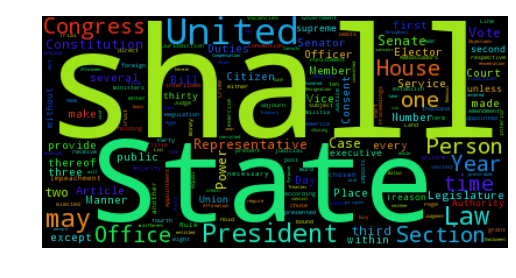

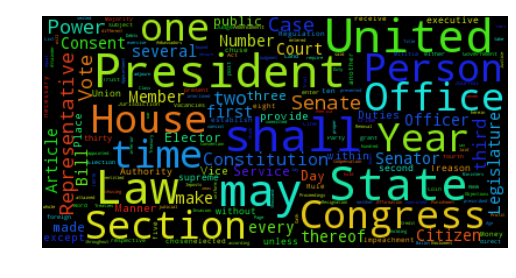

In [2]:
# coding=utf-8

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 读取文本
text = open("./constitution.txt").read()

# 生成词云
wordcloud = WordCloud().generate(text)

# 第一幅图，默认字体最大会达到屏幕宽度
plt.imshow(wordcloud)
plt.axis('off')

# 第二幅图，字体最大 40 px
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

# 显示
plt.show()

# 也可以使用 PIL 
# image = wordcloud.to_image()
# image.show()

# 显示结果保存为 'wordcloud.png'
# wordcloud.to_file('wordcloud.png')

生成词云的函数方法

```
wordcloud.WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=<function random_color_func>, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling=0)
```

- `font_path` : 字体路径
- `width` : 生成图片的宽度，如果有图片，则为图片宽度
- `height` : 生成图片的高度，如果有图片，则为图片高度
- `margin` : 字体与生成图片边缘的宽度
- `prefer_horizontal` : 水平摆放的字体占的比例，默认为 0.9，则垂直摆放的比例为 0.1
- `mask` : 用来作为形状的图片
- `scale` : 放大比例，默认为 1 即不放大
- `color_func` : 颜色生成方法，默认为 随机生成
- `max_words` : 最多单词数量，默认为 200
- `min_font_size` : 最小字体大小 默认为 4
- `stopwords` : 禁词，即不在图片中生成显示的词
- `random_state` : 随机状态，即有多少种随机配色
- `background_color` : 背景颜色，默认为黑色
- `max_font_size` : 最大字体大小
- `font_step` : 字体间隔，默认为 1
- `mode` : 图片模式,默认为 RGB 

### 做一个有形状的词云

文本是 [alice.txt](https://github.com/amueller/word_cloud/raw/master/examples/alice.txt) 使用的图片是 [alice_mask.jpg](http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg)

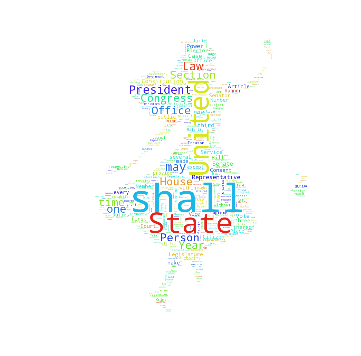

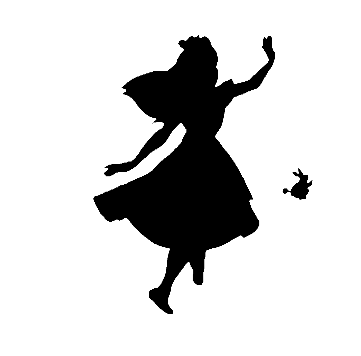

In [4]:
# coding=utf-8

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# 读取文本
text = open("./constitution.txt").read()

# 读取图片
alice_mask = np.array(Image.open('./alice_mask.jpg'))

# 设置禁词，不在词云中显示
stopwords = set(STOPWORDS)
stopwords.add("said")

# 生成词云，背景为白色，最多 2000 个词
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# 保存图片
wc.to_file('alice.png')

# 第一幅，生成的词云
plt.imshow(wc)
plt.axis("off")
plt.figure()

# 第二幅，原图
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

禁词 `wordcloud.STOPWORDS` 是一个 set 数组，可以使用 `wordcloud.STOPWORDS.add([str])` 添加一个禁词，或者 `wordcloud.STOPWORDS.union([list])` 添加一个数组。

可以查看现有的禁词 

```
>>> import wordcloud
>>> wordcloud.STOPWORDS
set(['', 'all', "she'll", 'just', "don't", 'being', 'over', 'through', 'yourselves', 'its', 'before', "he's", "when's", "we've", 'had', 'should', "he'd", 'to', 'only', "there's", 'those', 'under', 'ours', 'has', "haven't", 'do', 'them', 'his', "they'll", 'get', 'very', "who's", "they'd", 'cannot', "you've", 'they', 'not', 'during', 'yourself', 'him', 'nor', "we'll", 'like', 'did', "they've", 'this', 'she', 'each', "won't", 'where', "mustn't", "isn't", "i'll", "why's", 'www', 'because', "you'd", 'doing', 'some', 'up', 'are', 'further', 'ourselves', 'out', 'what', 'for', 'while', "wasn't", 'does', "shouldn't", 'above', 'between', 'ought', 'be', 'we', 'who', "you're", 'were', 'here', 'hers', "aren't", 'by', 'both', 'about', 'would', 'of', 'could', 'against', "i'd", "weren't", "i'm", 'com', 'or', "can't", 'own', 'into', 'whom', 'down', "hadn't", "couldn't", 'your', "doesn't", 'from', "how's", 'her', 'their', "it's", 'there', 'been', 'why', 'few', 'too', 'themselves', 'was', 'until', 'more', 'himself', "where's", "i've", 'with', "didn't", "what's", 'but', 'herself', 'than', "here's", 'he', 'me', "they're", 'myself', 'these', "hasn't", 'below', 'r', 'can', 'theirs', 'my', "wouldn't", "we'd", 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have', 'in', 'any', 'if', 'again', 'no', 'that', 'when', 'same', 'how', 'other', 'which', 'you', "shan't", 'http', 'our', 'after', "let's", 'most', 'such', 'on', "he'll", 'a', 'off', 'i', "she'd", 'yours', "you'll", 'so', "we're", "she's", 'the', "that's", 'having', 'once'])

```



### 做一个有颜色的词云

使用的图片是 [alice_color.jpg](http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010)


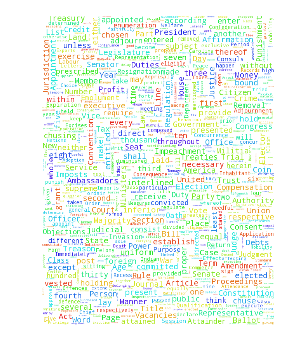

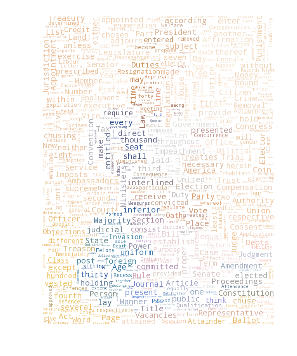

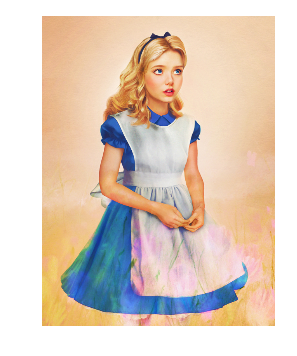

In [9]:
# coding=utf-8

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 读取文本
text = open("./constitution.txt").read()

# 读取图片
alice_coloring = np.array(Image.open('./alice_color.jpg'))

# 设置禁词
stopwords = set(STOPWORDS)
stopwords.add("said")

# 生成词云
wc = WordCloud(background_color="white", 
               max_words=2000, 
               mask=alice_coloring,
               stopwords=stopwords, 
               max_font_size=20, 
               random_state=100)
# generate word cloud
wc.generate(text)


# 从图片中获得颜色
image_colors = ImageColorGenerator(alice_coloring)

# 第一幅 生成的词云
plt.imshow(wc)
plt.axis("off")
plt.figure()

# 第二幅 重新上色，与图片的颜色相近
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()

# 第三幅 原图
plt.imshow(alice_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

### 使用自定义的颜色

使用的文本是 [a_new_hope.txt](https://github.com/amueller/word_cloud/raw/master/examples/a_new_hope.txt),使用的图片是 [stormtrooper_mask.png](http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif)


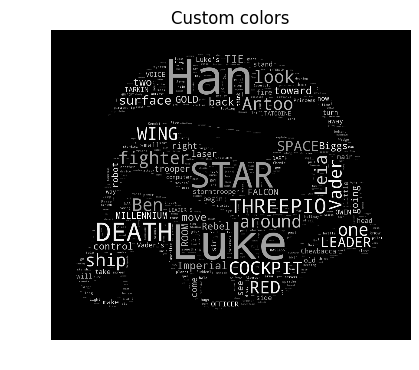

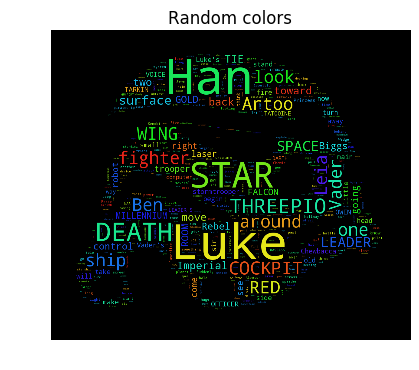

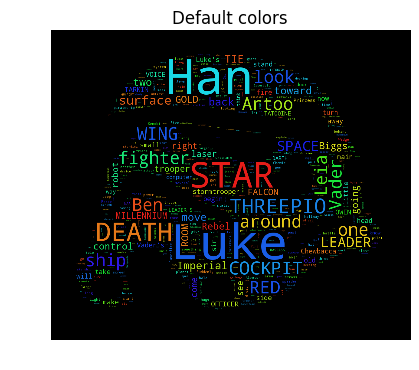

In [6]:
# coding=utf-8

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS, random_color_func

# 自定义灰色主色调
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# 读取文本
text = open("./a_new_hope.txt").read()

# 读取图片
mask = np.array(Image.open('./stormtrooper_mask.png'))

# preprocessing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, 
               mask=mask, 
               stopwords=stopwords, 
               margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()

# 第一幅 自定义颜色
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()

# 第二幅 随机颜色
plt.title("Random colors")
plt.imshow(wc.recolor(color_func=random_color_func, random_state=3))
plt.axis("off")
plt.figure()

# 第二幅 默认颜色
plt.title("Default colors")
plt.imshow(default_colors)
plt.axis("off")
plt.show()


### 限定颜色的词云

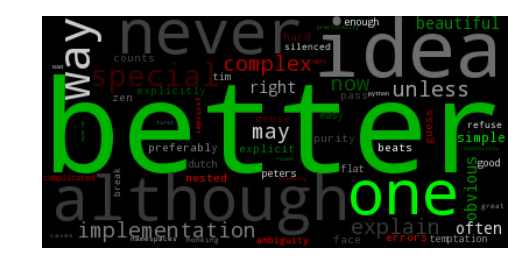

In [7]:
# coding=utf-8

from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [(get_single_color_func(color), set(words))
                                    for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(color_func
                              for (color_func, words) in self.color_func_to_words
                              if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = """The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud().generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.show()

### 制作中文的 词云

上面的例子都是使用英文，因为英文的单词都是分离的，直接就可以使用，但是中文的话，一个句子才有一个间隔，所以我们需要一个中文分词，如果直接使用 中文 文本的话，那就是一整段的，所以我们使用 jieba 做中文分词。

除了需要分词之外，我们还需要对中文指定字体，因为默认不支持中文字体，直接生成的话，会出现方块口。

我们使用的中文字体为 微软雅黑，我们使用的中文文本为许嵩的一首歌《断桥残雪》 文本内容为

```
断桥残雪

词曲编曲 许嵩

寻不到花的折翼枯叶蝶
永远也看不见凋谢
江南夜色下的小桥屋檐
读不懂塞北的荒野

梅开时节因寂寞而缠绵
春归后又很快湮灭
独留我赏烟花飞满天
摇曳后就随风飘远

断桥是否下过雪
我望着湖面
水中寒月如雪
指尖轻点融解

断桥是否下过雪
又想起你的脸
若是无缘再见
白堤柳帘垂泪好几遍

```


Building prefix dict from the default dictionary ...
Loading model from cache c:\users\dell\appdata\local\temp\jieba.cache
Loading model cost 0.919 seconds.
Prefix dict has been built succesfully.


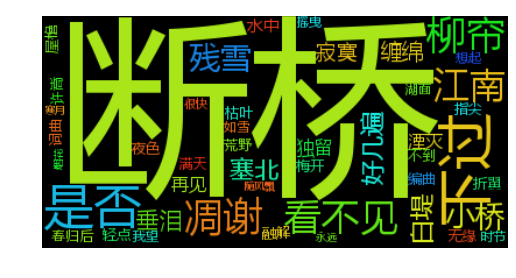

In [8]:
# coding=utf-8

import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 读取文本
text = open("./bridge_snow.txt").read()

# 中文分词，然后用空格连接起来
text = " ".join(jieba.cut(text))

# 生成词云
wordcloud = WordCloud(font_path='./msyh.ttc').generate(text)

# 第一幅图，默认字体最大会达到屏幕宽度
plt.imshow(wordcloud)
plt.axis('off')

# 显示
plt.show()